#Time series regression

In [0]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import urllib.request
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
from scipy import stats
from math import sqrt
%matplotlib inline

In [0]:
#helper method to create regression model
def create_model(degree, x_train, x_test ):
  polynomial_features = PolynomialFeatures(degree = degree)
  xp_train = polynomial_features.fit_transform(x_train)
  xp_test = polynomial_features.fit_transform(x_test)
  model = sm.OLS(y_train,xp_train).fit()
  return xp_train,xp_test, model

In [0]:
#download the dataset from github - This notebook is created in Google Colab.
#Run in Google colab itself. no need to set any environment
url = "https://raw.github.com/mohameddhameem/TimeSeries/master/oil.price.dat.txt"
print ("download start!")
filename, headers = urllib.request.urlretrieve(url, filename="/content/oil.price.dat.txt")
print ("download complete!")
print ("download file location: ", filename)

download start!
download complete!
download file location:  /content/oil.price.dat.txt


In [0]:
#read the CSV File from the local location
df = pd.read_csv('/content/oil.price.dat.txt')
print(df.count())
#set the index from 0
df.index = pd.RangeIndex(start=1, stop=242, step=1)

oil.price    241
dtype: int64


**Model to use data up to Jan 2005 and fit a time series model and perform forecast for next 12 months**

In [0]:
#Prepare the dataset for train and test
#Split the data set
train = df.iloc[:229,:]
x_train = np.array(train.index)
x_train = x_train.reshape(-1,1)

y_train = np.array(train['oil.price'])
y_train = y_train.reshape(-1,1)

test = df.iloc[229:,:]
x_test = np.array(test.index)
x_test = x_test.reshape(-1,1)

y_test = np.array(test['oil.price'])
y_test = y_test.reshape(-1,1)

##Fit Ploynomial Curve - Model 1

In [0]:
#here we do the experiment of degree to find best model
xp_train,xp_test, model = create_model(7, x_train, x_test)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     34.73
Date:                Tue, 03 Sep 2019   Prob (F-statistic):           3.44e-26
Time:                        08:07:20   Log-Likelihood:                -710.98
No. Observations:                 229   AIC:                             1434.
Df Residuals:                     223   BIC:                             1455.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001   1.15e-05     12.692      0.000       0.000       0.000
x1             0.0030      0.000     12.693      0.000       0.003       0.003
x2             0.0489      0.004     12.696      0.000       0.041       0.056
x3            -0.0014      0.000     -8.974      0.000      -0.002      -0.001
x4           1.64e-05    2.4e-06      6.829      0.000    1.17e-05    2.11e-05
x5         -9.513e-08   1.76e-08     -5.409      0.000    -1.3e-07   -6.05e-08
x6          2.711e-10   6.17e-11      4.394      0.000     1.5e-10    3.93e-10
x7         -3.022e-13   8.34e-14     -3.622      0.000   -4.67e-13   -1.38e-13
==============================================================================
Omnibus:                       24.697   Durbin-Watson:                   0.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.505
Skew:                           0.762   Prob(JB):                     2.38e-07
Kurtosis:                       3.935   Cond. No.                     6.72e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.72e+16. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

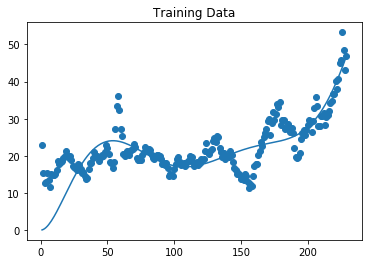

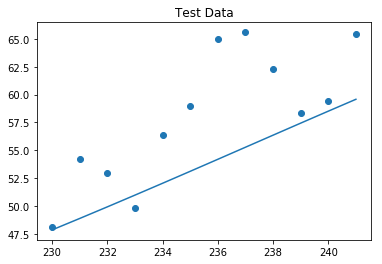

RMSE for prediction : 5.675660481377252
MSE for prediction : 32.21312189986746


In [0]:
ypred_train = model.predict(xp_train)
ypred_test = model.predict(xp_test)
plt.title("Training Data")
plt.scatter(x_train,y_train)
plt.plot(x_train,ypred_train)
plt.show()

plt.title("Test Data")
plt.scatter(x_test,y_test)
plt.plot(x_test,ypred_test)
plt.show()
mse = mean_squared_error(y_test, ypred_test)
print('RMSE for prediction :', sqrt(mse))
print('MSE for prediction :', mse)

###We have choosen a linear model of degree 7 which gives a lower MSE of 32.213 & RMSE 5.675

#Perform a second fit using data up to July 2005 and perform forecast for next 6 months.

In [0]:
#Prepare the dataset for train and test
#Split the data set
train = df.iloc[:235,:]
x_train = np.array(train.index)
x_train = x_train.reshape(-1,1)

y_train = np.array(train['oil.price'])
y_train = y_train.reshape(-1,1)

test = df.iloc[235:,:]
x_test = np.array(test.index)
x_test = x_test.reshape(-1,1)

y_test = np.array(test['oil.price'])
y_test = y_test.reshape(-1,1)

In [0]:
#here we do the experiment of degree to find best model
xp_train,xp_test, model = create_model(6, x_train, x_test)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     165.2
Date:                Tue, 03 Sep 2019   Prob (F-statistic):           4.28e-80
Time:                        08:07:21   Log-Likelihood:                -643.59
No. Observations:                 235   AIC:                             1301.
Df Residuals:                     228   BIC:                             1325.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.7710      1.828      9.720      0.000      14.168      21.374
x1            -0.4595      0.212     -2.165      0.031      -0.878      -0.041
x2             0.0289      0.008      3.713      0.000       0.014       0.044
x3            -0.0006      0.000     -4.518      0.000      -0.001      -0.000
x4          4.713e-06   9.48e-07      4.971      0.000    2.84e-06    6.58e-06
x5         -1.832e-08   3.49e-09     -5.256      0.000   -2.52e-08   -1.15e-08
x6          2.695e-11   4.91e-12      5.493      0.000    1.73e-11    3.66e-11
==============================================================================
Omnibus:                       13.887   Durbin-Watson:                   0.293
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.137
Skew:                           0.413   Prob(JB):                     6.99e-05
Kurtosis:                       4.127   Cond. No.                     3.51e+14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.51e+14. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

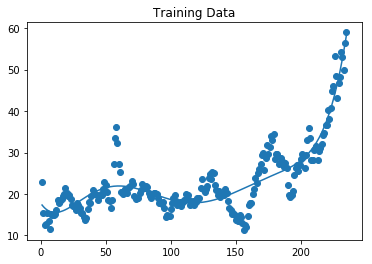

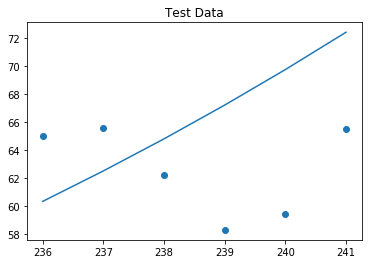

RMSE for prediction : 6.726485272158149
MSE for prediction : 45.24560411656048


In [0]:
ypred_train = model.predict(xp_train)
ypred_test = model.predict(xp_test)
plt.title("Training Data")
plt.scatter(x_train,y_train)
plt.plot(x_train,ypred_train)
plt.show()

plt.title("Test Data")
plt.scatter(x_test,y_test)
plt.plot(x_test,ypred_test)
plt.show()
mse = mean_squared_error(y_test, ypred_test)
print('RMSE for prediction :', sqrt(mse))
print('MSE for prediction :', mse)

##Train and Fit data from 1-Jan-2000 onwards

In [0]:
#Prepare the dataset for train and test
#Split the data set
train = df.iloc[175:235,:]
x_train = np.array(train.index)
x_train = x_train.reshape(-1,1)

y_train = np.array(train['oil.price'])
y_train = y_train.reshape(-1,1)

test = df.iloc[235:,:]
x_test = np.array(test.index)
x_test = x_test.reshape(-1,1)

y_test = np.array(test['oil.price'])
y_test = y_test.reshape(-1,1)

In [0]:
#here we do the experiment of degree to find best model
xp_train,xp_test, model = create_model(3, x_train, x_test)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     183.3
Date:                Tue, 03 Sep 2019   Prob (F-statistic):           6.34e-29
Time:                        08:14:12   Log-Likelihood:                -149.35
No. Observations:                  60   AIC:                             306.7
Df Residuals:                      56   BIC:                             315.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1647.1240    821.674      2.005      0.050       1.114    3293.134
x1           -20.5298     12.080     -1.699      0.095     -44.729       3.669
x2             0.0824      0.059      1.397      0.168      -0.036       0.201
x3            -0.0001   9.56e-05     -1.061      0.293      -0.000    9.01e-05
==============================================================================
Omnibus:                        2.503   Durbin-Watson:                   0.850
Prob(Omnibus):                  0.286   Jarque-Bera (JB):                1.668
Skew:                           0.349   Prob(JB):                        0.434
Kurtosis:                       3.423   Cond. No.                     1.93e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.93e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

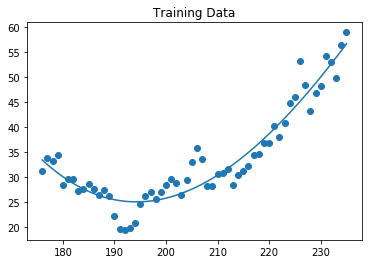

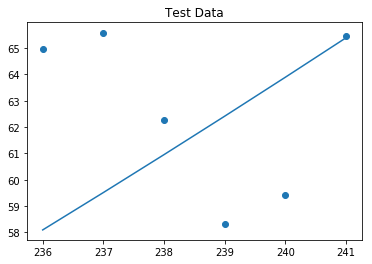

RMSE for prediction : 4.527100941512357
MSE for prediction : 20.49464293464207


In [0]:
ypred_train = model.predict(xp_train)
ypred_test = model.predict(xp_test)
plt.title("Training Data")
plt.scatter(x_train,y_train)
plt.plot(x_train,ypred_train)
plt.show()

plt.title("Test Data")
plt.scatter(x_test,y_test)
plt.plot(x_test,ypred_test)
plt.show()
mse = mean_squared_error(y_test, ypred_test)
print('RMSE for prediction :', sqrt(mse))
print('MSE for prediction :', mse)